# Predicting Stock Market Trends Using Historical Time Series Data

### Step 1: Data Collection (Scraping from Yahoo Finance)


##### Install yfinance

In [1]:
!pip install --upgrade yfinance


Active code page: 1252


##### Import necessary libraries

In [2]:
import yfinance as yf
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler





##### Using yfinance for Data Collection


In [3]:

def download_data_with_retry(ticker, start, end, interval, max_retries=5, delay=5):
    for attempt in range(max_retries):
        try:
            data = yf.download(ticker, start=start, end=end, interval=interval)
            

            print("Download successful!")
            return data
        except Exception as e:
            print(f"Attempt {attempt + 1} failed: {e}")
            time.sleep(delay)
    print("All retry attempts failed.")
    return None

# Define parameters
ticker = 'AAPL'
start_date = '2004-01-01'
end_date = '2024-01-01'
interval = '1d'

# Download data with retry
data = download_data_with_retry(ticker, start_date, end_date, interval)

                                



[*********************100%***********************]  1 of 1 completed

Download successful!


##### Check the records number 

In [4]:
if data is not None:
    print(f"Number of records downloaded: {len(data)}")
else:
    print("Data download failed.")

Number of records downloaded: 5033


#####  Rename Columns:

In [19]:
# Check if the DataFrame has MultiIndex columns
if isinstance(data.columns, pd.MultiIndex):
    # Flatten the MultiIndex (dropping the first level if needed)
    data.columns = data.columns.droplevel(0)

# After flattening, ensure the number of columns matches the number of new column names
data.columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'OtherColumn']


#####  Save the data to a CSV file

In [20]:
data.to_csv('AAPL_stock_data.csv')

 ##### Display the Data

In [21]:
data.head()


,Open,High,Low,Close,Adj Close,Volume,OtherColumn
Date,,,,,,,
2004-01-02 00:00:00+00:00,0.320548,0.380000,0.388393,0.378214,0.384821,144642400,NaN
2004-01-05 00:00:00+00:00,0.333954,0.395893,0.399821,0.382500,0.382500,395018400,NaN
2004-01-06 00:00:00+00:00,0.332749,0.394464,0.400357,0.387679,0.397321,509348000,NaN
2004-01-07 00:00:00+00:00,0.340281,0.403393,0.407679,0.391607,0.394643,586874400,NaN
2004-01-08 00:00:00+00:00,0.351880,0.417143,0.423750,0.404464,0.407857,460303200,NaN


In [22]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,OtherColumn
Date,,,,,,,
2020-09-24 00:00:00+00:00,105.641212,108.220001,110.250000,105.000000,105.169998,167743300,6.331734
2020-09-25 00:00:00+00:00,109.604454,112.279999,112.440002,107.669998,108.430000,149981400,5.749855
2020-10-30 00:00:00+00:00,106.265961,108.860001,111.989998,107.720001,111.059998,190272600,4.965905
2020-11-02 00:00:00+00:00,106.178108,108.769997,110.680000,107.320000,109.110001,122866900,3.975263
2020-11-03 00:00:00+00:00,107.808311,110.440002,111.489998,108.730003,109.660004,107624400,2.468189


####  Step 2 :  Data Preprocessing

In [12]:

# Load the data
data = pd.read_csv('AAPL_stock_data.csv', parse_dates=['Date'], index_col='Date')

# Inspect the data
print(data.info())  # Check for missing values, column types, etc.

# Check for missing values
print(data.isnull().sum())

# Handle missing values using forward fill
data = data.ffill()

# Detect and remove outliers (using IQR as an example)
Q1 = data['Close'].quantile(0.25)
Q3 = data['Close'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['Close'] >= (Q1 - 1.5 * IQR)) & (data['Close'] <= (Q3 + 1.5 * IQR))]

# Scaling
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5033 entries, 2004-01-02 00:00:00+00:00 to 2023-12-29 00:00:00+00:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5033 non-null   float64
 1   High       5033 non-null   float64
 2   Low        5033 non-null   float64
 3   Close      5033 non-null   float64
 4   Adj Close  5033 non-null   float64
 5   Volume     5033 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.2 KB
None
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [13]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-02 00:00:00+00:00,0.320548,0.380000,0.388393,0.378214,0.384821,144642400
2004-01-05 00:00:00+00:00,0.333954,0.395893,0.399821,0.382500,0.382500,395018400
2004-01-06 00:00:00+00:00,0.332749,0.394464,0.400357,0.387679,0.397321,509348000
2004-01-07 00:00:00+00:00,0.340281,0.403393,0.407679,0.391607,0.394643,586874400
2004-01-08 00:00:00+00:00,0.351880,0.417143,0.423750,0.404464,0.407857,460303200


#### Step 3 : Exploratory Data Analysis (EDA)

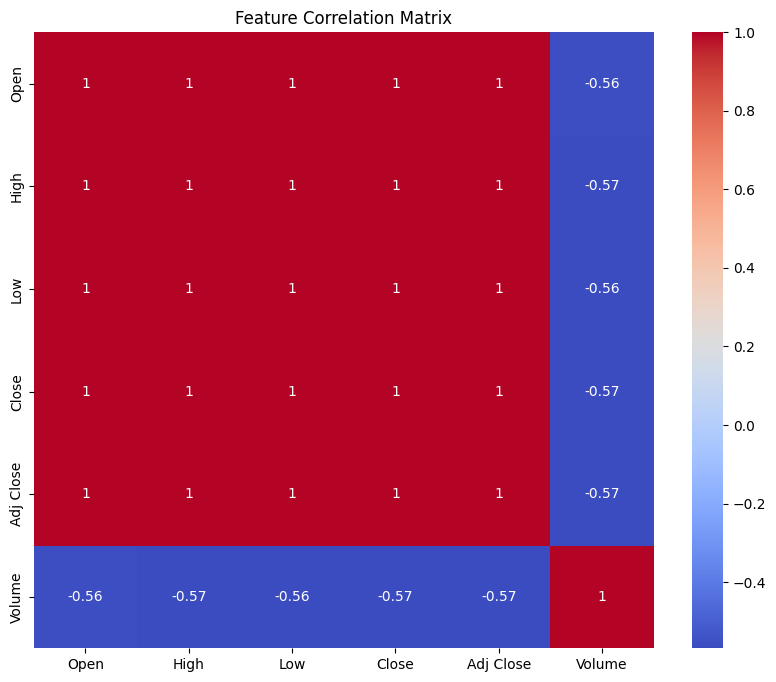

In [14]:


# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()




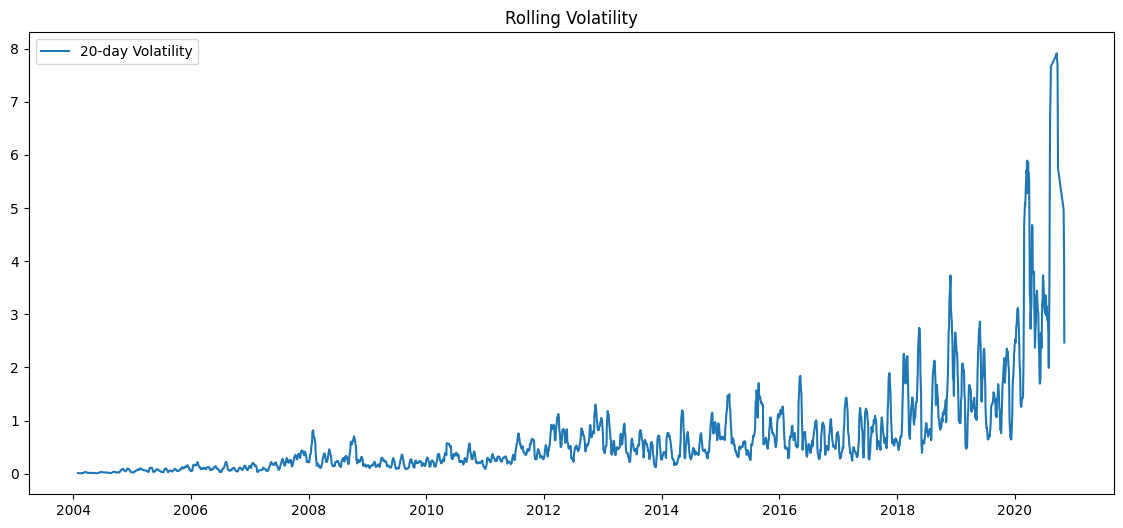

In [15]:
# Rolling volatility
data['Volatility'] = data['Close'].rolling(window=20).std()
plt.figure(figsize=(14, 6))
plt.plot(data['Volatility'], label='20-day Volatility')
plt.title("Rolling Volatility")
plt.legend()
plt.show()